In [1]:
#in_rds = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/annotation/gff_A2_black/mergedSamples/allSamples.integrated.rds" 
se_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/SE.rds"
labels_meta = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/pseudotime_seurat"
order_f = ""
to_de = FALSE
use.seurat=TRUE
#"/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/annotation/gff_A2_black/mergedSamples/" 

In [2]:
labels.meta <- read.table(labels_meta, sep="\t")

In [3]:
# BiocManager::install("Rsamtools")
# install.packages("Signac")
#library(BiocManager)
## have to do this because the remotes package has stupid defaults
## and will error on something as trivial as a binary package being built on a slightly different R version
#Sys.setenv(R_REMOTES_NO_ERRORS_FROM_WARNINGS = "true")
#BiocManager::install("cole-trapnell-lab/monocle3")
#install.packages('R.utils')
#remotes::install_github('satijalab/seurat-wrappers')

library(monocle3)
library(Signac)
library(Seurat)
library(SeuratWrappers)
library(Matrix)
library(ggplot2)
library(patchwork)
set.seed(1234)

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading requir

In [4]:
se <- readRDS(se_f)
se <- AddMetaData(se, labels.meta["cluster_labels"])


In [5]:
se

An object of class Seurat 
212927 features across 13593 samples within 2 assays 
Active assay: RNA (19039 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap

In [6]:
DefaultAssay(se) <- "ATAC"


In [7]:
# Seurat_Object_Diet <- DietSeurat(seurat_object, graphs = "pca")
# SCE <- as.SingleCellExperiment(Seurat_Object_Diet)

In [8]:
################
## With new clusters and umap
se.cds <- as.cell_data_set(se)
# se.cds <- cluster_cells(cds = se.cds, reduction_method = "UMAP")
# se.cds <- learn_graph(se.cds, use_partition = TRUE)
print("use initial umap")
print(use.seurat)
################
if(!use.seurat){
    se.cds <- cluster_cells(cds = se.cds, reduction_method = "UMAP")  
}else{
    ################
    ## With seurat clusters and umap
    reacreate.partition<-c(rep(1,length(se.cds@colData@rownames)))
    reacreate.partition
    names(reacreate.partition)<-se.cds@colData@rownames
    reacreate.partition<-as.factor(reacreate.partition)
    reacreate.partition

    se.cds@clusters$UMAP$partitions<-reacreate.partition
    se.cds
    #Assign the cluster information

    list_cluster<-se@active.ident
    se.cds@clusters$UMAP$clusters<-list_cluster
    #Assign UMAP coordinate-cell embeddings

se.cds@int_colData@listData$reducedDims$UMAP<-se@reductions$umap@cell.embeddings    
}

se.cds <- learn_graph(se.cds, use_partition = TRUE)

Warning message in .check_reddim_names(x, value, withDimnames):
“non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.”
Warning message in .check_reddim_names(x, value, withDimnames):
“non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.”
Warning message in .check_reddim_names(x, value[[v]], withDimnames = TRUE, vname = sprintf("value[[%s]]", :
“non-NULL 'rownames(value[[1]])' should be the same as 'colnames(x)' for
'reducedDims<-'. This will be an error in the next release of
Bioconductor.”
Warning message in .check_reddim_names(x, value[[v]], withDimnames = TRUE, vname = sprintf("value[[%s]]", :
“non-NULL 'rownames(value[[2]])' should be the same as 'colnames(x)' for
'reducedDims<-'. This will be an error in the next release of
Bioconductor.”
Warning message:
“Monocle 3 trajectories require cluster partitions,

[1] "use initial umap"
[1] TRUE
  |======================================================================| 100%


Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”


In [9]:
se.cds <- learn_graph(se.cds, use_partition = TRUE)

  |======================================================================| 100%


Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”


Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


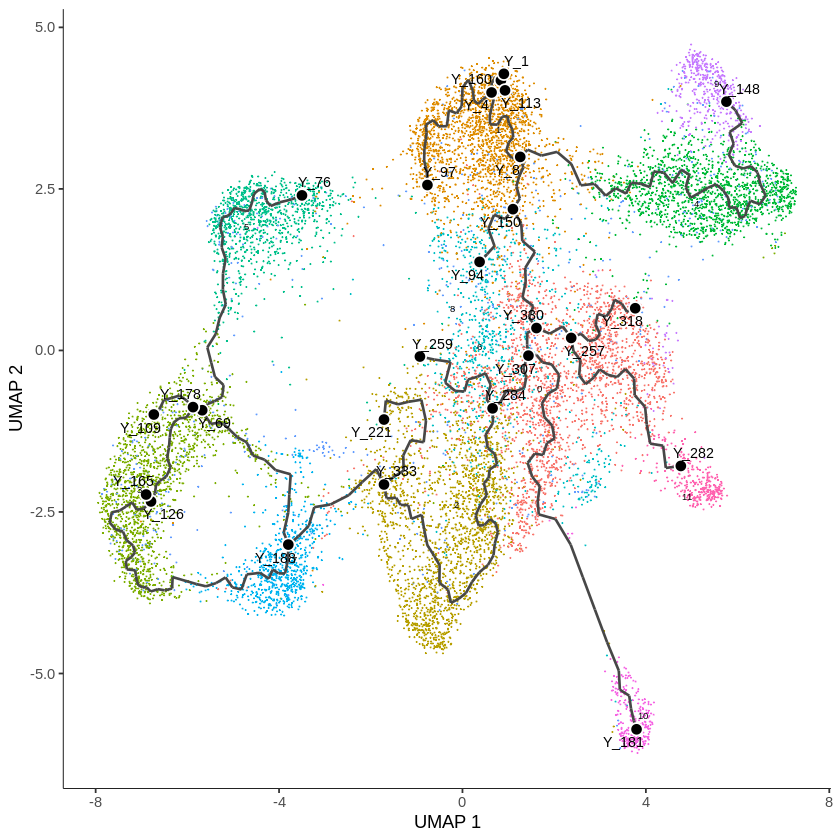

In [10]:
# plot trajectories colored by pseudotime
plot_cells(
  cds = se.cds,
  show_trajectory_graph = TRUE, label_principal_points = TRUE
)

In [11]:
# order cells
# interactive more or not
# if (order_f == ""){
#    se.cds <- order_cells(se.cds, reduction_method = "UMAP", root_pr_nodes = c('Y_85',
#                                                                               'Y_88', 
#                                                                               'Y_117')) 
# }else{
#     se.cds <- order_cells(se.cds, reduction_method = "UMAP", root_cells = hsc)
# }

if (use.seurat){
   se.cds <- order_cells(se.cds, reduction_method = "UMAP", root_pr_nodes = c('Y_284',
                                                                              'Y_307', 
                                                                              'Y_330'))
    branches = list("b1"=c(307, 76), "b2"=c(307, 109), "b3"=c(307,282), 
                    "b4"=c(307, 148), "b5"=c(307, 148), "b6"=c(307, 1), "b7"=c(307, 97), 
                    "b8"=c(307,165))

}else{
   se.cds <- order_cells(se.cds, reduction_method = "UMAP", root_pr_nodes = c('Y_85',
                                                                              'Y_88', 
                                                                              'Y_117'))
    branches = list("b1"=c(85, 18), "b2"=c(88, 18), "b3"=c(85, 60), "b4"=c(88, 60), 
                 "b5"=c(85, 75), "b6"=c(85, 1), "b7"=c(85, 134), "b8"=c(85, 93))
}
branches

$b1
[1] 307  76

$b2
[1] 307 109

$b3
[1] 307 282

$b4
[1] 307 148

$b5
[1] 307 148

$b6
[1] 307   1

$b7
[1] 307  97

$b8
[1] 307 165

Cells aren't colored in a way that allows them to be grouped.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



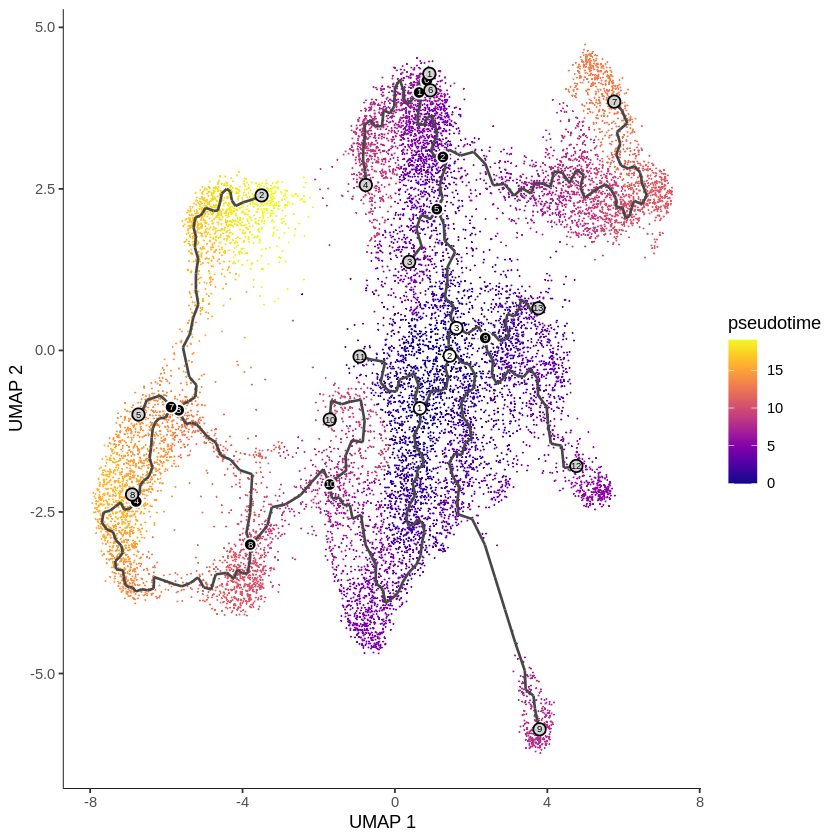

In [12]:
# plot trajectories colored by pseudotime
plot_cells(
  cds = se.cds,
  color_cells_by = "pseudotime",
  show_trajectory_graph = TRUE
)
ggsave(file.path(outdir, "SE.pseudotime.trajectory.png"))
ggsave(file.path(outdir, "SE.pseudotime.trajectory.pdf"))



In [13]:
se <- AddMetaData(
  object = se,
  metadata = se.cds@principal_graph_aux@listData$UMAP$pseudotime,
  col.name = "pseudotime"
)


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



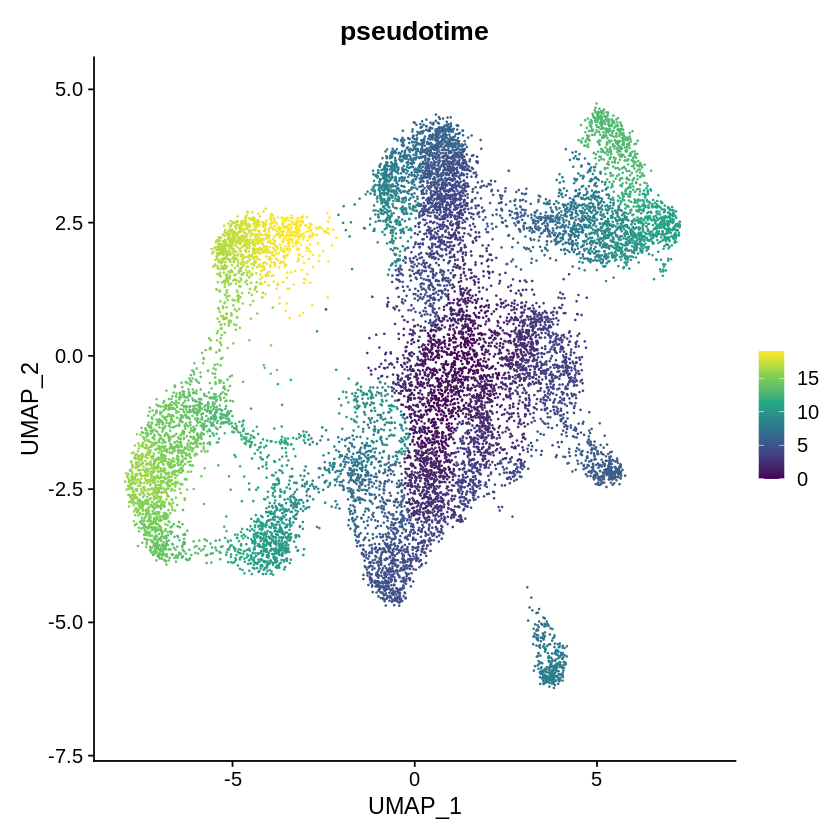

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



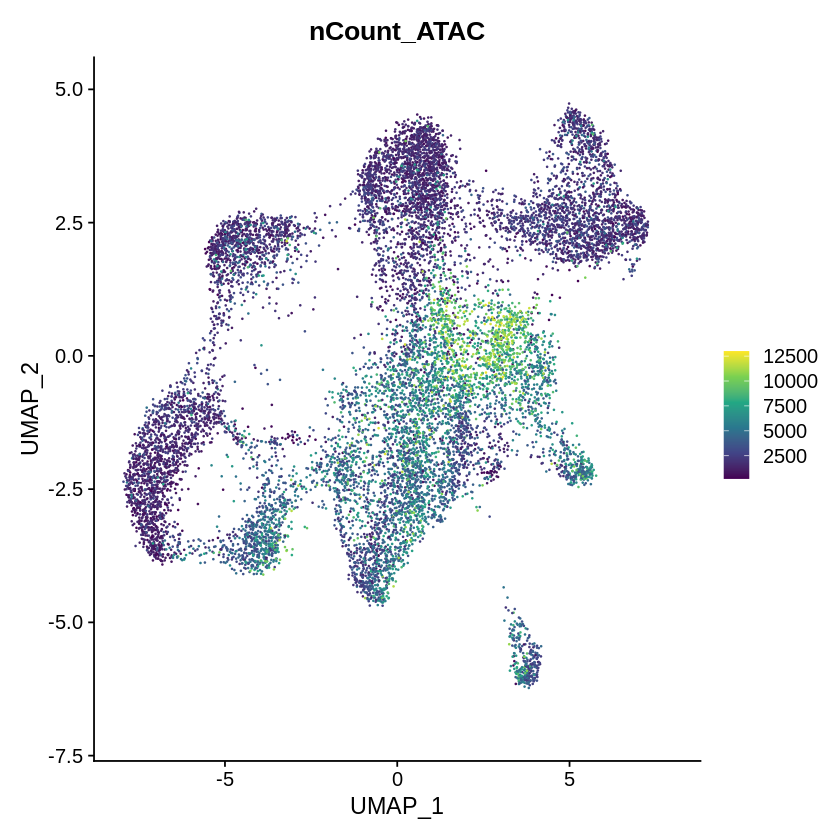

In [14]:
FeaturePlot(se, c("pseudotime"), pt.size = 0.1) & scale_color_viridis_c()
ggsave(file.path(outdir, "SE.pseudotime.png"))
ggsave(file.path(outdir, "SE.pseudotime.pdf"))
FeaturePlot(se, c("nCount_ATAC"), pt.size = 0.1) & scale_color_viridis_c()
ggsave(file.path(outdir, "SE.pseudotime.nCountPeaks.png"))
ggsave(file.path(outdir, "SE.pseudotime.nCountPeaks.pdf"))




In [15]:
#colData(se.cds)$cluster_labels <- se[["seurat_clusters"]]
#colData(se.cds)$cluster_labels

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



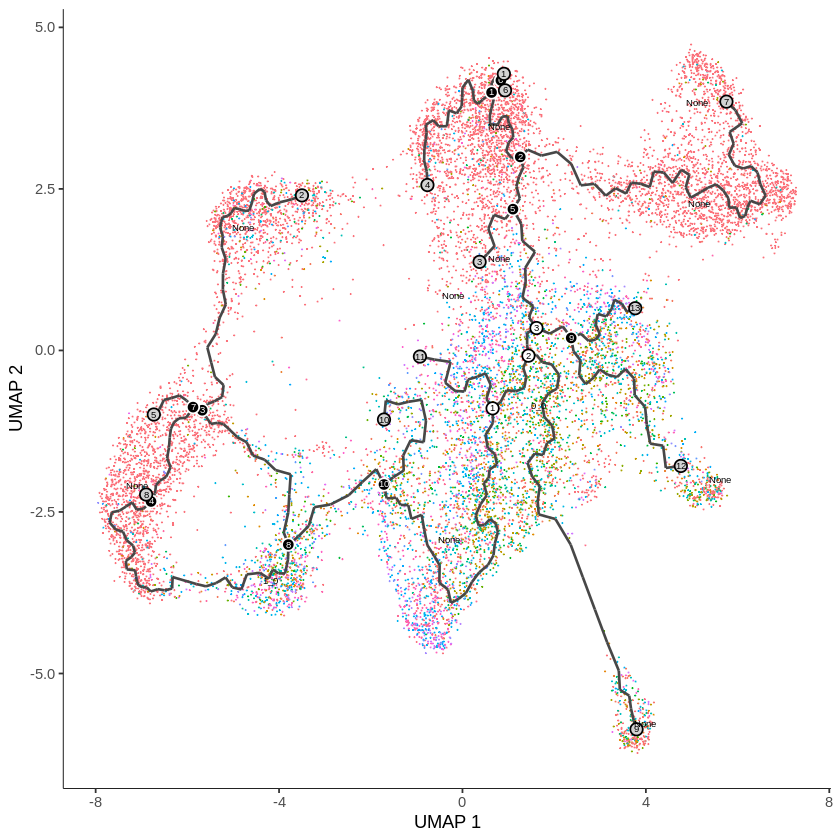

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



In [16]:

#cds_subset = cluster_cells(cds_subset, resolution=1e-2)
#plot_cells(se.cds, color_cells_by="seurat_clusters")
#ggsave(file.path(outdir, "pseudo.clusters.png"))
#cds_subset = cluster_cells(cds_subset, resolution=1e-2)
plot_cells(se.cds, color_cells_by="name")
ggsave(file.path(outdir, "pseudo.clone.png"))
ggsave(file.path(outdir, "pseudo.clone.pdf"))


#cds_subset = cluster_cells(cds_subset, resolution=1e-2)
plot_cells(se.cds, color_cells_by="donor")
ggsave(file.path(outdir, "pseudo.donor.png"))
ggsave(file.path(outdir, "pseudo.donor.pdf"))

In [17]:
#plot_cells(se.cds, color_cells_by="seurat_clusters", label_cell_groups=TRUE)
plot_cells(se.cds, color_cells_by="cluster_labels", label_cell_groups=TRUE)

---

---

## Separate by segments

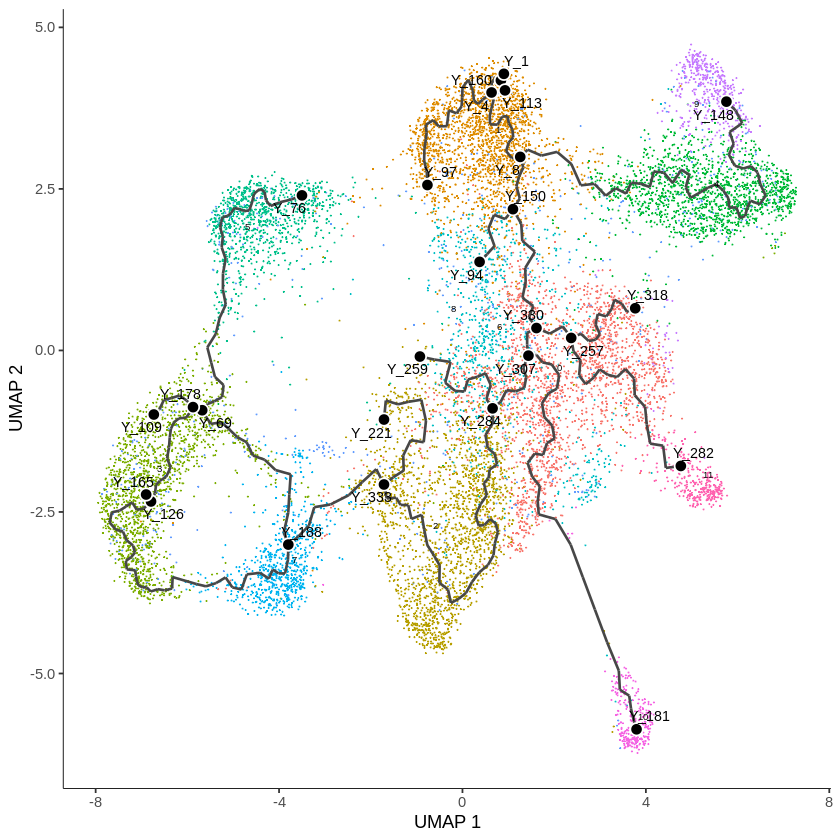

In [18]:
plot_cells(se.cds, label_principal_points = TRUE)

## branches
label_principal_points = TRUE

(same area)
b1: 85, 18
b2: 119, 18
b3: 85, 60
b4, 119, 60

--
b5: 85,75
b6: 85, 1
b7: 85, 134
b8: 85,93

In [19]:
colData(se.cds)["pseudotime"] = pseudotime(se.cds)

In [20]:
choose_segments <- function(start_end, curr.se){
    print(start_end)
    return(choose_graph_segments(curr.se,
                          reduction_method = "UMAP",
                          starting_pr_node = start_end[1],
                          ending_pr_nodes = start_end[2]))
}

se.branches <- sapply(branches, choose_segments, curr.se=se.cds)

[1] 307  76
[1] 307 109
[1] 307 282
[1] 307 148
[1] 307 148
[1] 307   1
[1] 307  97
[1] 307 165


## Assign branch ID columns to each

In [21]:
curr.se <- se.cds 
for (i in 1:length(se.branches)){
    curr.name <- names(se.branches)[i]
    colData(curr.se)[curr.name] = "FALSE"
    colData(curr.se)[colnames(se.branches[[i]]), curr.name ] = "TRUE"
    #print(names(se.branches)[i])   
}
curr.se
#sapply(se.branches, add.branch.id = ...,simplify = FALSE, USE.NAMES = TRUE)

class: cell_data_set 
dim: 193888 13593 
metadata(0):
assays(2): counts logcounts
rownames(193888): chr1-9866-10638 chr1-180724-181403 ...
  chrY-21580389-21580825 chrY-56727981-56728332
rowData names(0):
colnames(13593): Flt3l_AAACGAAAGGAGACTC-1 Flt3l_AAACGAAAGTCACGCC-1 ...
  Input_TTTGTGTTCGGGACAA-1 Input_TTTGTGTTCTGGCACG-1
colData names(51): orig.ident nCount_ATAC ... b7 b8
reducedDimNames(2): INTEGRATED_LSI UMAP
mainExpName: ATAC
altExpNames(0):

[1] "b1"
[1] "b2"


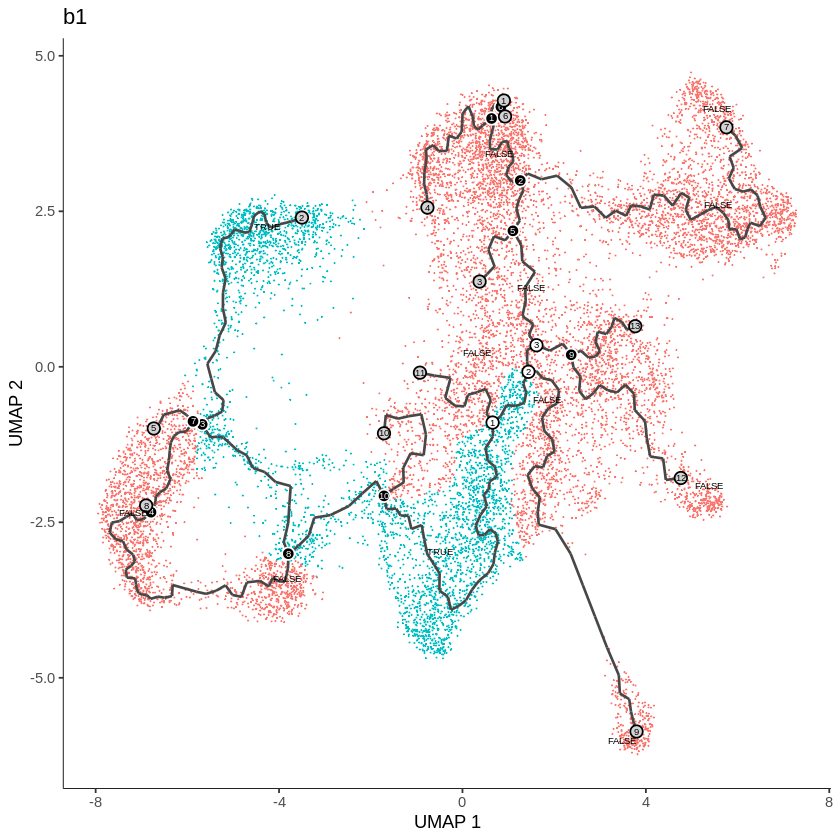

[1] "b3"


[1] "b4"


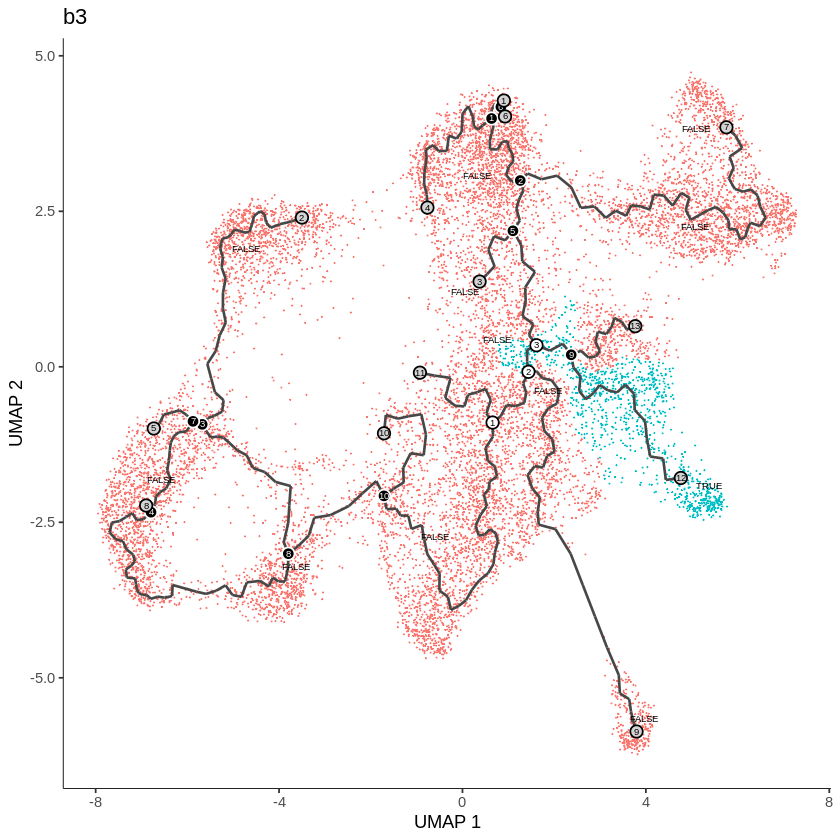

[1] "b5"


[1] "b6"


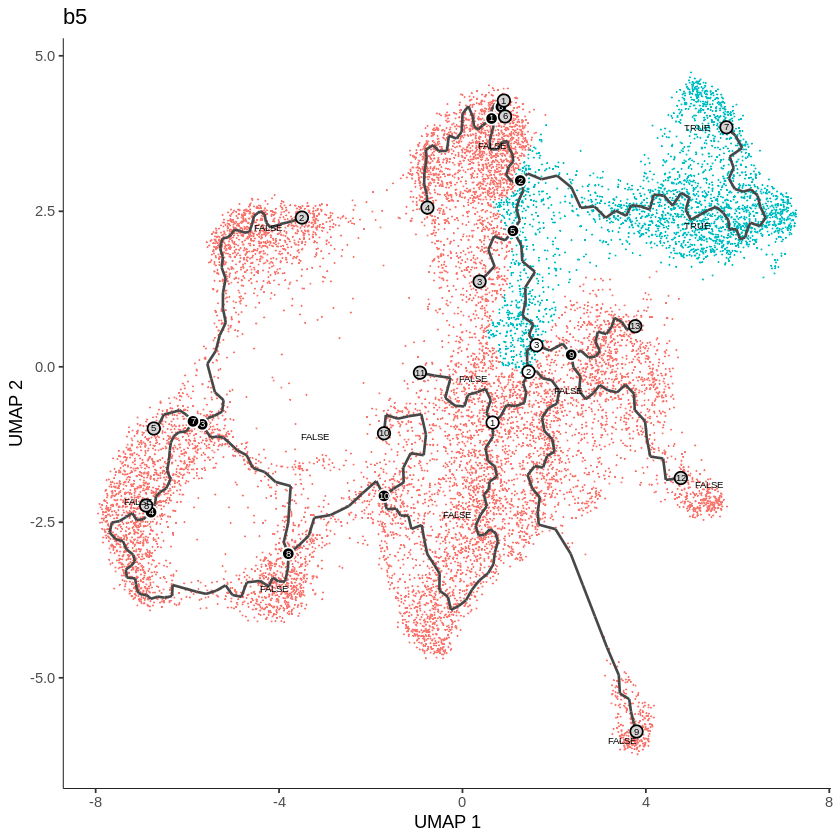

[1] "b7"


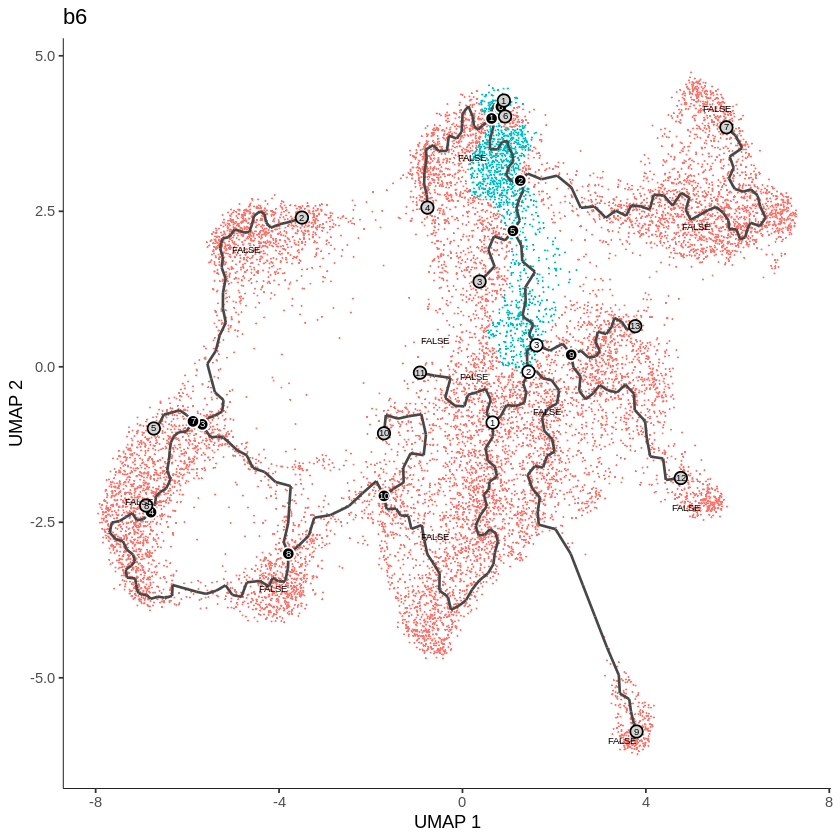

[1] "b8"


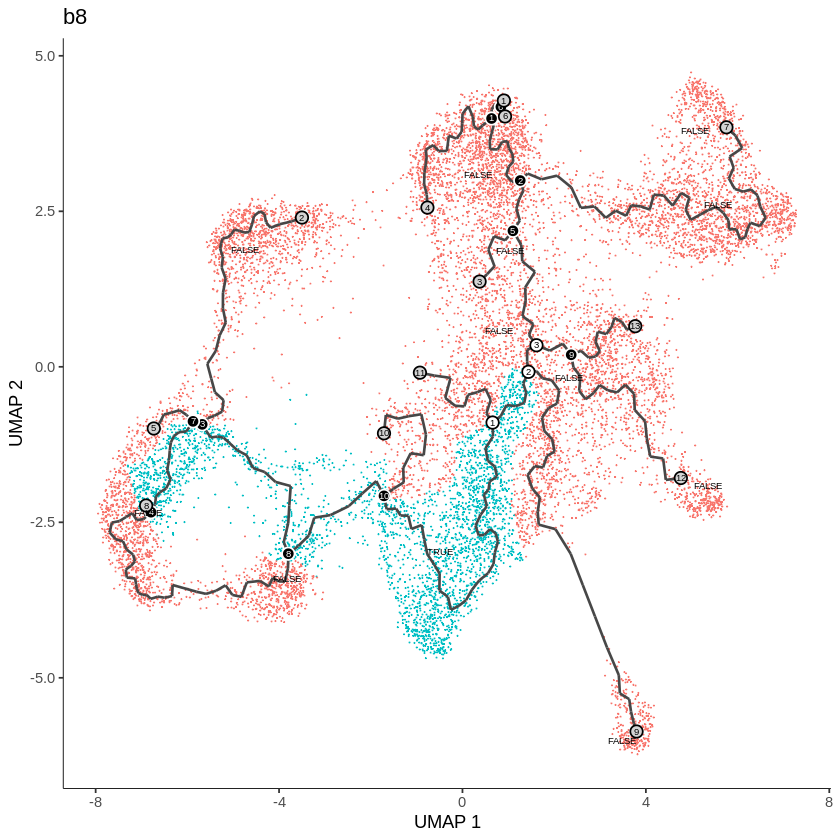

In [22]:
for (i in names(branches)){
    print(i)
    print(plot_cells(curr.se, color_cells_by=i) + ggtitle(i)) 
}

## save output

In [23]:
write.table(colData(curr.se), file.path(outdir, "cells_meta_branchID.tsv"), sep="\t")

In [24]:
#saveRDS(se, file.path(outdir, "SE.pseudotime.rds"))
saveRDS(curr.se, file.path(outdir, "SE.cds.rds"))

## Run DE

In [25]:
## Pseudotime DE
#https://broadinstitute.github.io/2019_scWorkshop/functional-pseudotime-analysis.html

if(to_de){
    de_res <- graph_test(se.cds, neighbor_graph = "principal_graph", cores = 16)
    write.table(de_res, file.path(outdir, "branch.de.atac.tsv"),quote = FALSE, sep="\t")
    de_res
}



In [26]:
## Run de within the subsets

# cds_subset <- se.branches[[1]]


# subset_pr_test_res <- graph_test(cds_subset, neighbor_graph="principal_graph", cores=4)
# pr_deg_ids <- row.names(subset(subset_pr_test_res, q_value < 0.05))
# gene_module_df <- find_gene_modules(cds_subset[pr_deg_ids,], resolution=0.001)
# agg_mat <- aggregate_gene_expression(cds_subset, gene_module_df)
# module_dendro <- hclust(dist(agg_mat))
# gene_module_df$module <- factor(gene_module_df$module, 
#                                 levels = row.names(agg_mat)[module_dendro$order])

# plot_cells(cds_subset,
#            genes=gene_module_df,
#            label_cell_groups=FALSE,
#            show_trajectory_graph=FALSE)

# cds_m <- reduce_dimension(cds = se.branches[[1]], reduction_method = "UMAP")
# cds_m <- cluster_cells(cds = se.branches[[1]], reduction_method = "UMAP")
# plot_cells(se.branches[[1]], color_cells_by="cluster_labels")

In [27]:
# ## Interactive mode
# cds_m <- choose_graph_segments(
#   se.cds,
#   reduction_method = "UMAP",
# )
# cds_m
